# Income Age 2016

In [76]:
# Dependencies
import requests
import pandas as pd
from census import Census
import json
import matplotlib.pyplot as plt
import scipy.stats as st

from scipy.stats import linregress

In [38]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2016
)

In [60]:
# Run Census Search to retrieve data on all states (2016 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19049_001E",
        "B19049_002E",
        "B19049_003E",
        "B19049_004E",
        "B19049_005E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_age_2016 = pd.DataFrame(census_data)

# Column renaming
income_age_2016 = income_age_2016.rename(
    columns = {
        "B19049_001E": "Household Income Total",
        "B19049_002E": "Household Income Under 25 years",
        "B19049_003E": "Household Income 25 to 44 years",
        "B19049_004E": "Household Income 45 to 64 years",
        "B19049_005E": "Household Income 65 years and over",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_age_2016 = income_age_2016[
    [
        "Name",
        "Household Income Total",
        "Household Income Under 25 years",
        "Household Income 25 to 44 years",
        "Household Income 45 to 64 years",
        "Household Income 65 years and over"
    ]
]

income_age_2016 = income_age_2016.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_age_2016)}")
income_age_2016

Number of rows in the DataFrame: 52


,State,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Mississippi,40528.0,22097.0,44609.0,46729.0,31321.0
1,Missouri,49593.0,24947.0,55312.0,59638.0,36862.0
2,Montana,48380.0,27191.0,55197.0,56992.0,36956.0
3,Nebraska,54384.0,28598.0,59886.0,67947.0,38712.0
4,Nevada,53094.0,32111.0,55131.0,61355.0,42453.0
5,New Hampshire,68485.0,35672.0,75233.0,82900.0,45599.0
6,New Jersey,73702.0,33775.0,79431.0,90790.0,47236.0
7,New Mexico,45674.0,24992.0,47567.0,54098.0,37792.0
8,New York,60741.0,29884.0,67678.0,72292.0,40369.0
9,North Carolina,48256.0,25728.0,51764.0,57243.0,36870.0


In [61]:
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")

In [74]:
income_age = pd.merge(income_age_2016, listing_prices, on=('State'), how='right')

income_age = income_age[["State",
                         "Year_Month_2016",
                         "Median Lising Price_2016",
                         "Household Income Total",
                         "Household Income Under 25 years",
                         "Household Income 25 to 44 years",
                         "Household Income 45 to 64 years",
                         "Household Income 65 years and over"
                        ]]

#income_age["Median Lising Price_2016"] = income_age["Median Lising Price_2016"].map("${:,.2f}".format)
#income_age["Household Income Total"] = income_age["Household Income Total"].map("${:,.2f}".format)
#income_age["Household Income Under 25 years"] = income_age["Household Income Under 25 years"].map("${:,.2f}".format)
income_age["Household Income 25 to 44 years"] = income_age["Household Income 25 to 44 years"].map("${:,.2f}".format)
income_age["Household Income 45 to 64 years"] = income_age["Household Income 45 to 64 years"].map("${:,.2f}".format)
income_age["Household Income 65 years and over"] = income_age["Household Income 65 years and over"].map("${:,.2f}".format)

income_age

,State,Year_Month_2016,Median Lising Price_2016,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Arkansas,201612,158500.0,42336.0,23547.0,"$47,339.00","$49,835.00","$33,291.00"
1,Idaho,201612,259000.0,49174.0,25194.0,"$53,078.00","$59,801.00","$37,247.00"
2,Missouri,201612,159000.0,49593.0,24947.0,"$55,312.00","$59,638.00","$36,862.00"
3,South Dakota,201612,215000.0,52078.0,30668.0,"$58,311.00","$63,633.00","$37,420.00"
4,Iowa,201612,164900.0,54570.0,27458.0,"$62,191.00","$67,143.00","$38,140.00"
5,New Jersey,201612,289900.0,73702.0,33775.0,"$79,431.00","$90,790.00","$47,236.00"
6,Utah,201612,331650.0,62518.0,33282.0,"$65,272.00","$78,140.00","$46,542.00"
7,Virginia,201612,268900.0,66149.0,31159.0,"$71,234.00","$80,461.00","$46,764.00"
8,New Hampshire,201612,274900.0,68485.0,35672.0,"$75,233.00","$82,900.00","$45,599.00"
9,North Carolina,201612,249000.0,48256.0,25728.0,"$51,764.00","$57,243.00","$36,870.00"


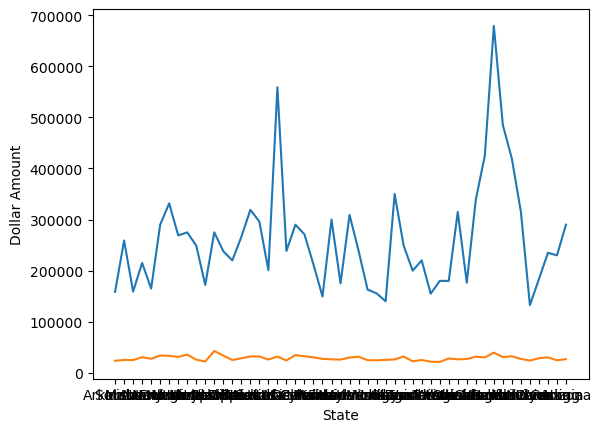

In [87]:
x_value = income_age['State']
y_value = income_age['Median Lising Price_2016']
x_value2 = income_age['State']
y_value2 = income_age['Household Income Under 25 years']
plt.plot(x_value,y_value)
plt.plot(x_value2,y_value2)
plt.xlabel("State")
plt.ylabel("Dollar Amount")
plt.show()